In [2]:
import numpy as np

In [3]:
import pandas as pd

In [30]:
df = pd.read_csv('Kaggle_dataset_with_sentiment_IBM_Google - Kaggle_dataset_with_sentiment.csv')

In [31]:
df

,text,y_pred_IBM,y_pred_Google,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0.000000,-0.1,neutral
1,@VirginAmerica plus you've added commercials t...,-0.920794,-0.7,positive
2,@VirginAmerica I didn't today... Must mean I n...,-0.531993,0.1,neutral
3,@VirginAmerica it's really aggressive to blast...,-0.865650,-0.9,negative
4,@VirginAmerica and it's a really big bad thing...,-0.954912,-0.8,negative
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,0.982488,0.7,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,-0.858279,-0.4,negative
14637,@AmericanAir Please bring American Airlines to...,0.000000,0.0,neutral
14638,"@AmericanAir you have my money, you change my ...",-0.812430,-0.5,negative


In [32]:
def assign_number(x):
    if x == 'negative':
        return -1
    elif x == 'neutral':
        return 0
    elif x == 'positive':
        return 1

In [33]:
def assign(x):
    if x <= -0.4:
        return -1
    elif -0.3 <= x <= 0.3:
        return 0
    elif x >= 0.4:
        return 1

In [34]:
print(df["y_pred_IBM"])

0        0.000000
1       -0.920794
2       -0.531993
3       -0.865650
4       -0.954912
           ...   
14635    0.982488
14636   -0.858279
14637    0.000000
14638   -0.812430
14639    0.000000
Name: y_pred_IBM, Length: 14640, dtype: float64


In [35]:
print(df["y_pred_Google"])

0       -0.1
1       -0.7
2        0.1
3       -0.9
4       -0.8
        ... 
14635    0.7
14636   -0.4
14637    0.0
14638   -0.5
14639   -0.1
Name: y_pred_Google, Length: 14640, dtype: float64


In [36]:
df["y_pred_IBM"]=df["y_pred_IBM"].round(1)

In [37]:
df["y_pred_google_binary"] = df["y_pred_Google"].apply(assign)

In [38]:
df["y_pred_ibm_binary"] = df["y_pred_IBM"].apply(assign)

In [50]:
df["y_true"] = df["airline_sentiment"].apply(assign_number)

In [51]:
print(df)

                                                    text  y_pred_IBM  \
0                    @VirginAmerica What @dhepburn said.         0.0   
1      @VirginAmerica plus you've added commercials t...        -0.9   
2      @VirginAmerica I didn't today... Must mean I n...        -0.5   
3      @VirginAmerica it's really aggressive to blast...        -0.9   
4      @VirginAmerica and it's a really big bad thing...        -1.0   
...                                                  ...         ...   
14635  @AmericanAir thank you we got on a different f...         1.0   
14636  @AmericanAir leaving over 20 minutes Late Flig...        -0.9   
14637  @AmericanAir Please bring American Airlines to...         0.0   
14638  @AmericanAir you have my money, you change my ...        -0.8   
14639  @AmericanAir we have 8 ppl so we need 2 know h...         0.0   

       y_pred_Google airline_sentiment  y_pred_google_binary  \
0               -0.1           neutral                     0   
1      

In [52]:
import seaborn as sns

In [53]:
sns.set(style="darkgrid")

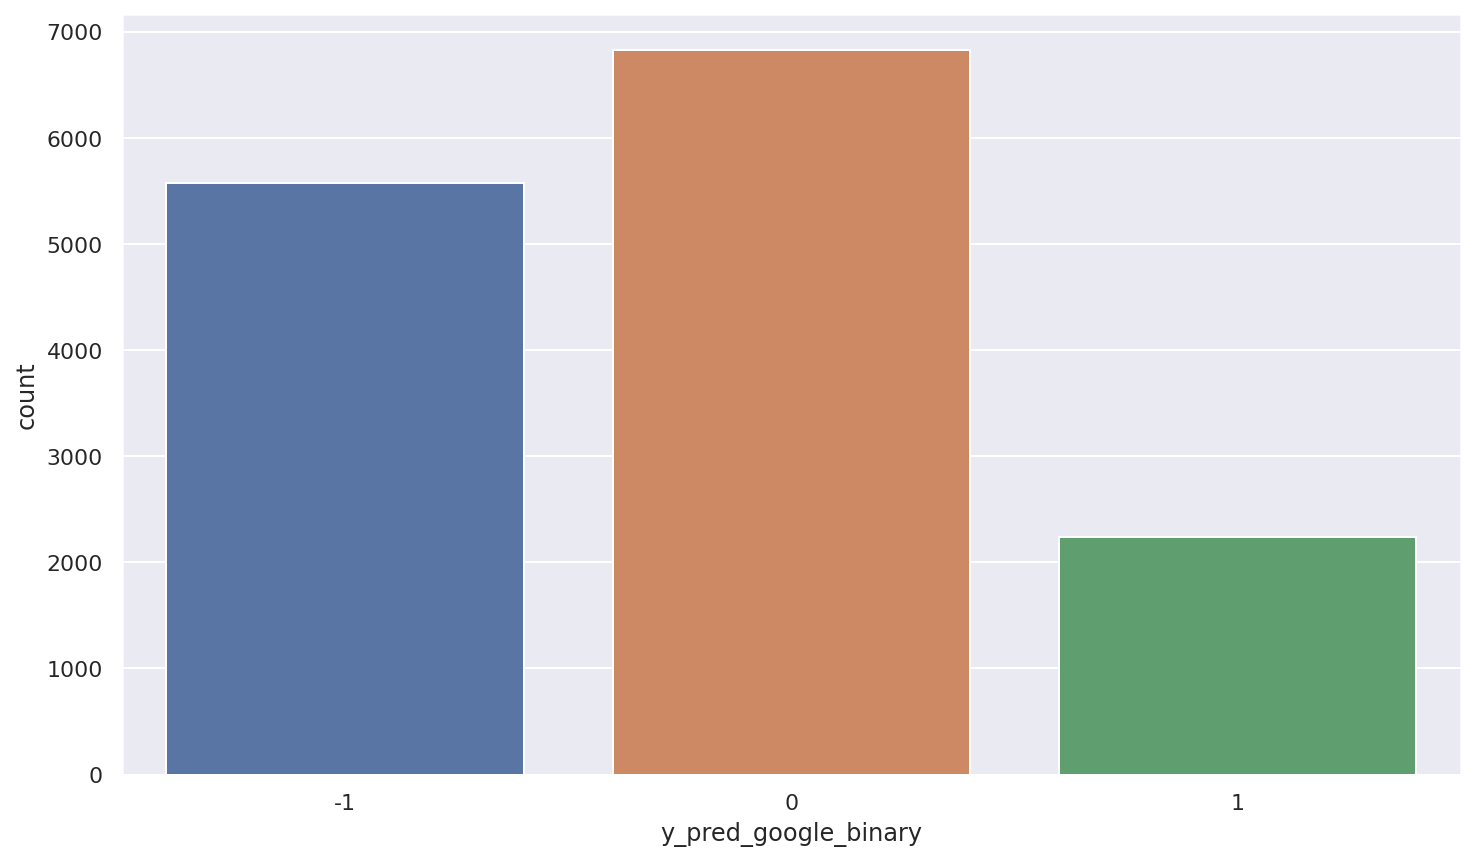

In [54]:
ax = sns.countplot(x=df["y_pred_google_binary"], data=df)

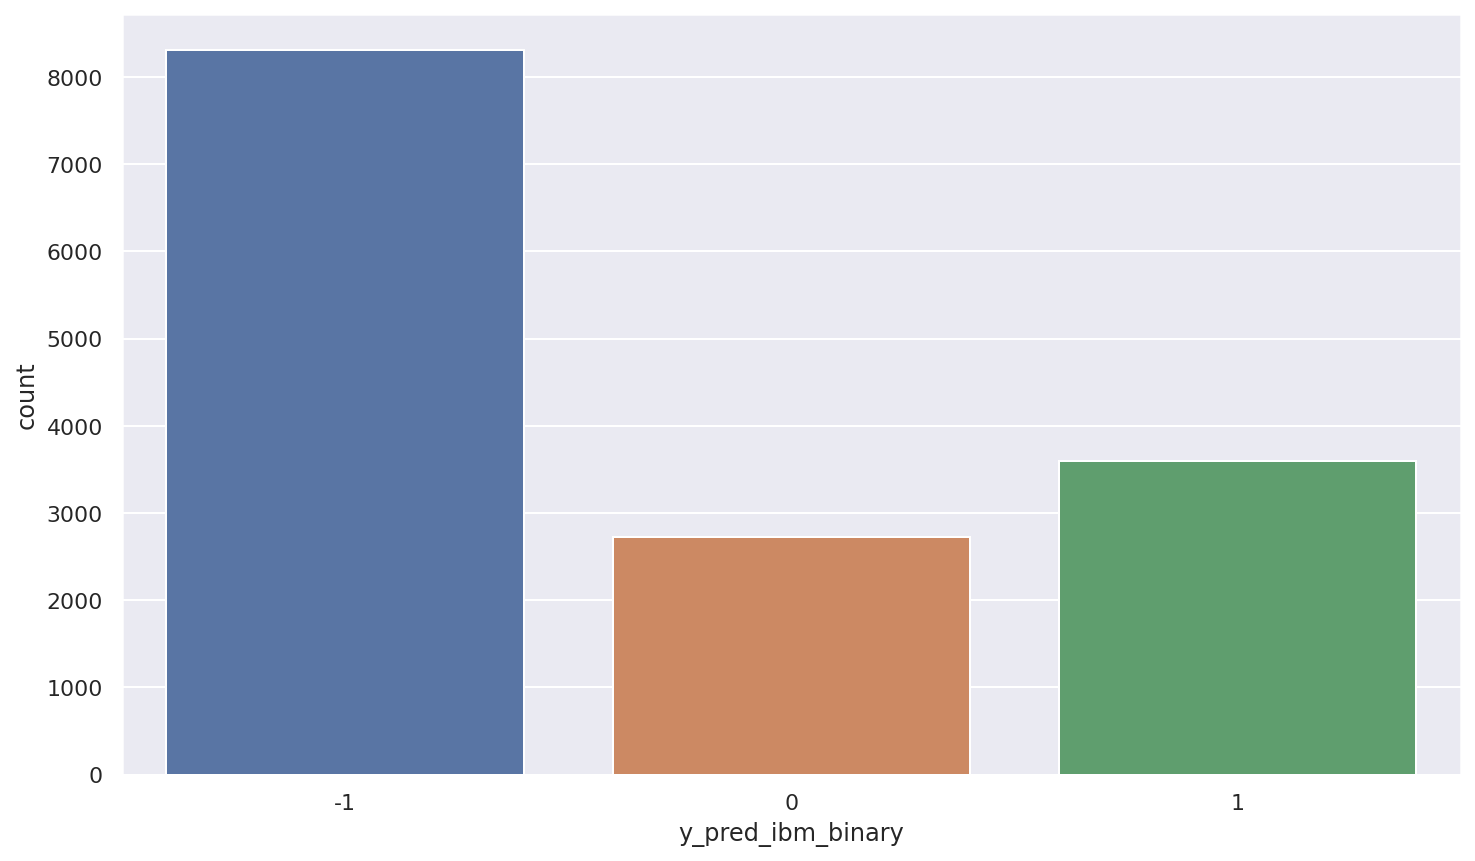

In [55]:
ax = sns.countplot(x=df["y_pred_ibm_binary"], data=df)

In [56]:
df["y_pred_google_binary"].value_counts()

 0    6828
-1    5574
 1    2238
Name: y_pred_google_binary, dtype: int64

In [57]:
df["y_pred_ibm_binary"].value_counts()

-1    8312
 1    3599
 0    2729
Name: y_pred_ibm_binary, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
# Google

In [60]:
accuracy_score(df["y_true"], df["y_pred_google_binary"])

0.6368852459016393

In [61]:
from sklearn.metrics import recall_score

In [62]:
recall_score(df["y_true"], df["y_pred_google_binary"], average='weighted')

0.6368852459016393

In [63]:
from sklearn.metrics import f1_score

In [64]:
f1_score(df["y_true"], df["y_pred_google_binary"], average='weighted')

0.6649212565007269

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(df["y_true"], df["y_pred_google_binary"])

array([[5187, 3811,  180],
       [ 366, 2406,  327],
       [  21,  611, 1731]])

<AxesSubplot: >

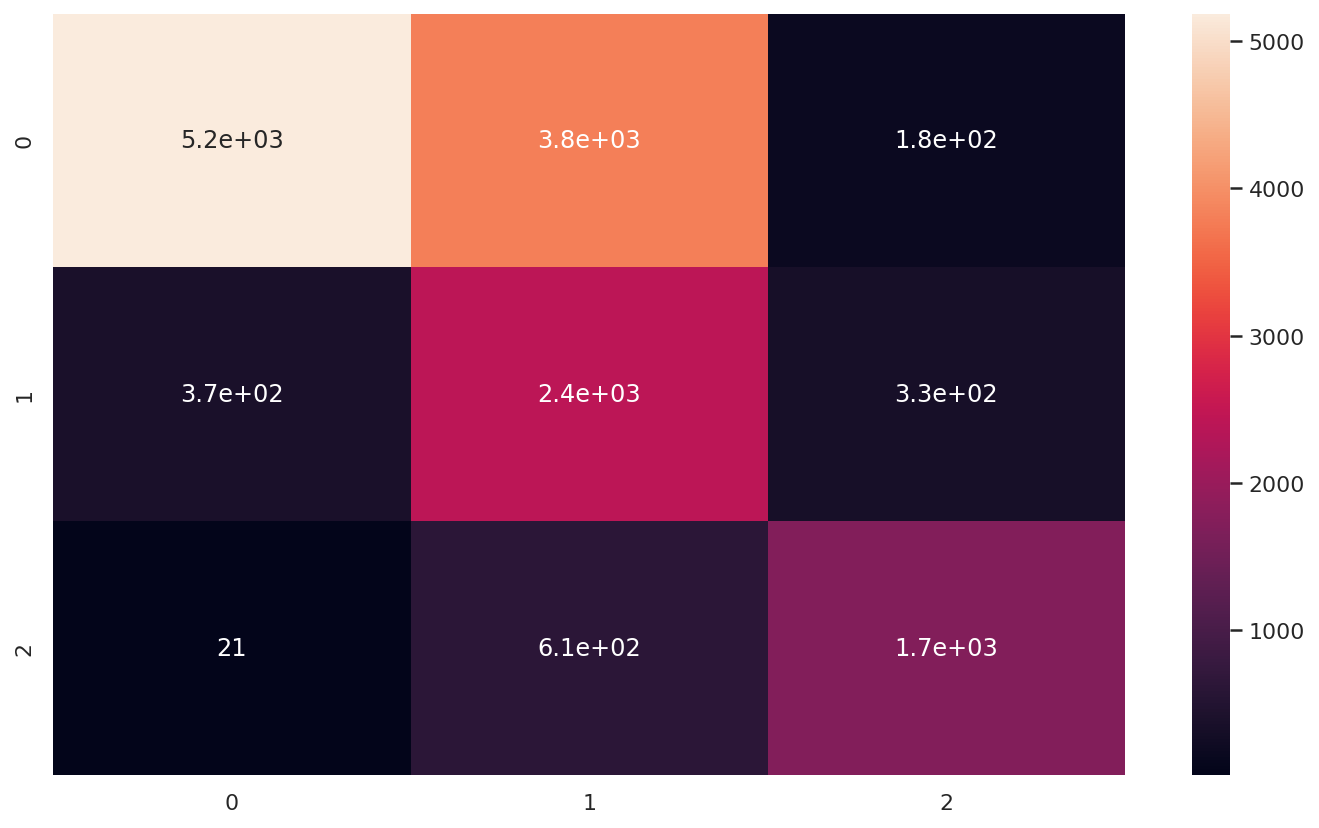

In [67]:
import seaborn as sns
sns.heatmap(confusion_matrix(df["y_true"], df["y_pred_google_binary"]), annot=True)

In [68]:
# IBM

In [69]:
accuracy_score(df["y_true"], df["y_pred_ibm_binary"])

0.732103825136612

In [70]:
recall_score(df["y_true"], df["y_pred_ibm_binary"], average='weighted')

0.732103825136612

In [71]:
f1_score(df["y_true"], df["y_pred_ibm_binary"], average='weighted')

0.733752734969867

In [72]:
confusion_matrix(df["y_true"], df["y_pred_ibm_binary"])

array([[7260, 1145,  773],
       [ 913, 1409,  777],
       [ 139,  175, 2049]])

<AxesSubplot: >

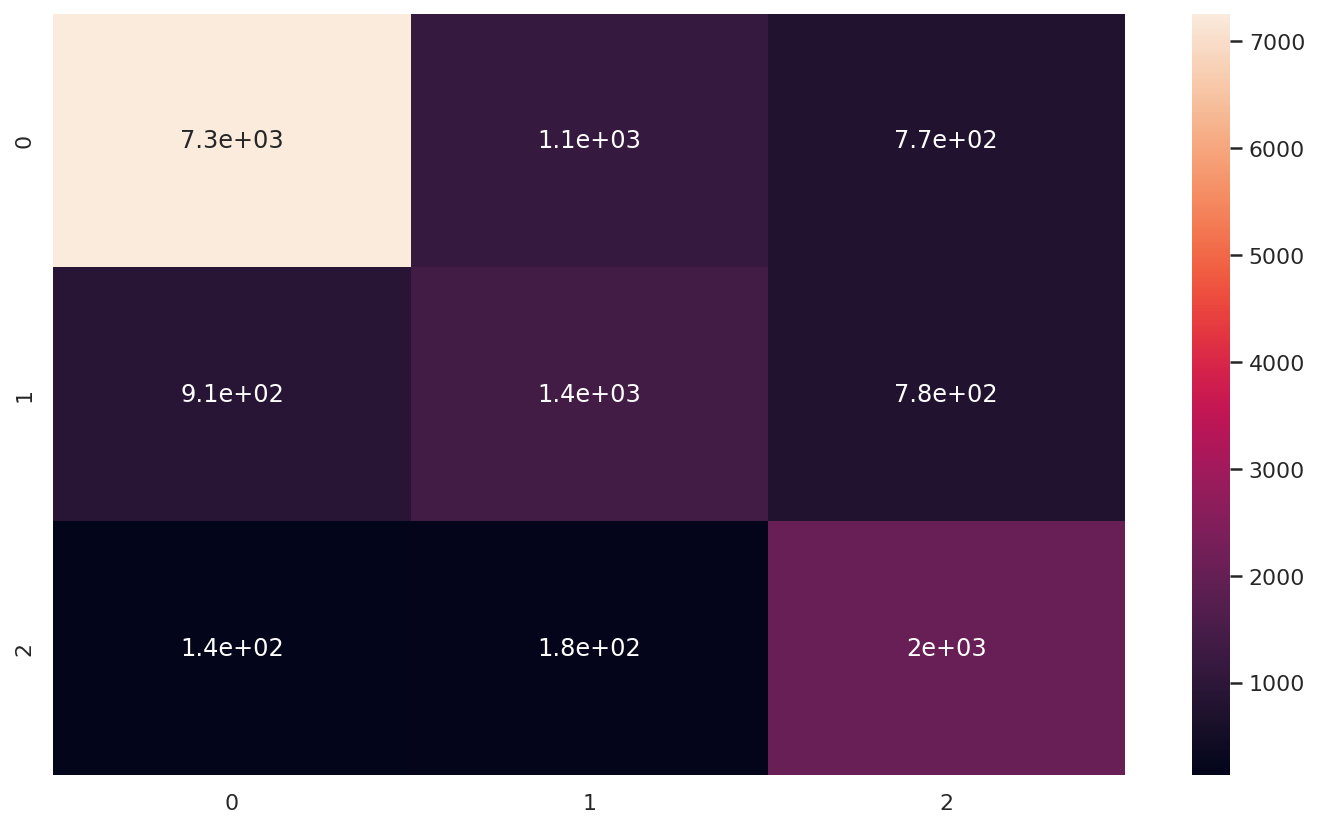

In [73]:
sns.heatmap(confusion_matrix(df["y_true"], df["y_pred_ibm_binary"]), annot=True)